### USA Housing Prices

**About dataset and Objective:** The dataset is about USA housing prices, using which we have to predict the price of a house.<br/>

**Attributes:**  The dataset has the following attributes:
1. Avg. Area Income<br/>
2. Avg. Area House Age<br/>
3. Avg. Area Number of Rooms<br/>
4. Avg. Area Number of Bedrooms<br/>
5. Area Population<br/>
6. Price<br/>
7. Address<br/>

**Importing packages**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas_profiling 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
os.getcwd()

'C:\\Users\\xsmaddurve\\Downloads\\Chaitanya_Pratice\\Linear_Regression\\Assignment'

In [2]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv(os.getcwd() + r"\attachment_USA_Housing_lyst2290.csv")
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [4]:
data.shape

(5000, 7)

No.of Rows:5000, No.of Columns: 7
    

In [5]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [6]:
 data.drop(['Address','Avg. Area Number of Bedrooms'], axis=1, inplace=True)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


### Question: Perform Descriptive Statistics on the dataset

In [7]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,69621.713378,2.469066e+06


In [8]:
data['Price'].get_values()

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

### Question: Remove missing values from the data frame if any

###  Question: Perform EDA and find any correlation

In [9]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.002040,0.335664
Area Population,-0.016234,-0.018743,0.002040,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.408556,1.000000


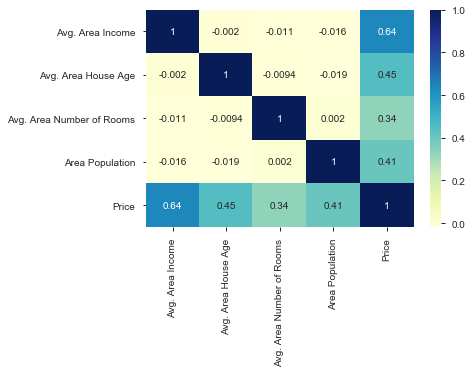

In [10]:
ax = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [11]:
pandas_profiling.ProfileReport(data)

### Question: Perform Regression using Linear Regression and analyse the metrics

## STEP 1- CREATE FEATURES AND LABEL

In [12]:
y = data['Price']    
x = data.drop(['Price'], axis = 1, inplace=False)  
                              
x.shape
y.shape

(5000, 4)

(5000,)

In [13]:
x.head(10)

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Area_Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
5,80175.754159,4.988408,6.104512,26748.428425
6,64698.463428,6.025336,8.147760,60828.249085
7,78394.339278,6.989780,6.620478,36516.358972
8,59927.660813,5.362126,6.393121,29387.396003
9,81885.927184,4.423672,8.167688,40149.965749


## STEP 2- SPLIT TRAIN AND TEST DATA

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(4000, 4)

(4000,)

(1000, 4)

(1000,)

## STEP 3- CREATE INSTANT OF THE MODEL

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## STEP 4- FIT MODEL

In [16]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## STEP 5- PREDICT USING THE TRAINED MODEL

In [17]:
predicted = lm.predict(x_test)
predicted.shape

(1000,)

## STEP 6- EVALUATE MODEL PERFORMANCE

In [18]:
metrics.mean_squared_error(y_test, predicted)
metrics.mean_absolute_error(y_test,predicted)

10064841889.373352

81120.40515177677

In [45]:
predicted_train = lm.predict(x_train)
predicted_train.shape
metrics.mean_squared_error(y_train, predicted_train)
metrics.mean_absolute_error(y_train, predicted_train)

(4000,)

10264523116.930511

81402.44854338584

In [19]:
lm.coef_

array([2.16539899e+01, 1.65809204e+05, 1.21783114e+05, 1.52488383e+01])

In [20]:
lm.intercept_

-2647391.3126673745

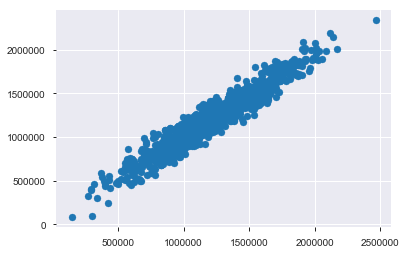

In [21]:
plt.scatter(y_test ,predicted) 

plt.show()

# score the model

In [46]:
from sklearn.metrics import r2_score
print("Test:", r2_score(y_test,predicted))
print("Train:", r2_score(y_train,predicted_train))

Test: 0.9195867887070901
Train: 0.9175663258113878


# Calculating the Prediction Error

In [23]:
test_data = pd.concat([x_test, y_test],1)

In [25]:
test_data['predicted'] = predicted

In [27]:
test_data["Prediction_error"] = round(test_data['predicted']-test_data['Price'],2)

In [28]:
test_data.head()

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Area_Population,Price,predicted,Prediction_error
1034,74740.732876,5.625513,5.787261,29954.617619,1.168355e+06,1.065369e+06,-102985.86
250,51949.295703,6.209803,8.051118,35336.063054,1.086072e+06,1.026485e+06,-59587.19
2578,51445.186752,6.841166,7.482817,44966.067802,1.093873e+06,1.197892e+06,104018.30
3525,79631.587772,6.458640,7.690480,50954.001981,1.882119e+06,1.861412e+06,-20706.38
3533,65152.580233,5.893075,6.116973,47984.612295,1.167422e+06,1.217202e+06,49780.00


# Using Statsmodel to build Linear Regression

In [30]:
data.head()

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [39]:
data.rename({'Avg._Area_Income': 'Avg_Area_Income', 'Avg._Area_House_Age': 'Avg_Area_House_Age', 'Avg._Area_Number_of_Rooms':'Avg_Area_Number_of_Rooms'}, axis=1, inplace=True)

In [43]:
data.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [42]:
model = smf.ols('Price ~ Avg_Area_Income+Avg_Area_House_Age+Avg_Area_Number_of_Rooms+Area_Population', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:18:57   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
model = smf.ols('Price ~ Avg_Area_Income+Avg_Area_House_Age+Avg_Area_Number_of_Rooms+Area_Population', data=data).fit()
print(model.summary())